In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder 
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import pickle
%matplotlib inline


In [2]:
#import data
df=pd.read_csv('../data/interim/Mall_Customers.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
53,54,Male,59,43,60
186,187,Female,54,101,24
199,200,Male,30,137,83
155,156,Female,27,78,89
132,133,Female,25,72,34


In [3]:
#cleansing
#investing
df.shape

(200, 5)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
df.describe(include='O').T

,count,unique,top,freq
Gender,200,2,Female,112


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#check missing value
#there is no missing value
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

In [12]:
#drop unnecessary columns
#no need for  clustering phase
df['customerid'].nunique()

200

In [13]:
df.drop('customerid',axis=1,inplace=True)

In [14]:
df.dtypes

gender                    object
age                        int64
annual_income_(k$)         int64
spending_score_(1-100)     int64
dtype: object

In [15]:
#check rows 
#check unique id and logic
#check object
for i in  df.select_dtypes('object'):
    print(f'for {i} : \n',df[i].value_counts())
    print('-'*60)

for gender : 
 Female    112
Male       88
Name: gender, dtype: int64
------------------------------------------------------------


In [16]:
#check numeric
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score_(1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [17]:
#feature engineering
#there is no domain knowledge feature,string operation,data and time feature ,web users nor geospatial feature

In [18]:
#detec and handle outliers
#there is no outliers to be handled

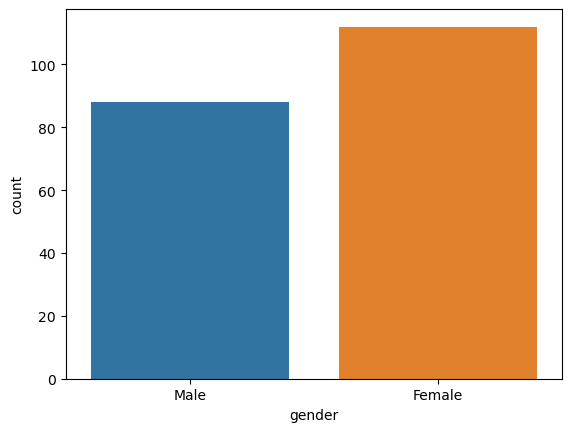

<Figure size 640x480 with 0 Axes>

In [19]:
#data understanding
#univariate analysis
#for categorical features

for i in df.select_dtypes('object').columns :
    sns.countplot(x=df[i])
    plt.figure()

In [20]:
#for numeric features
for i in df.select_dtypes('number').columns:
    print()
    fig=px.histogram(df,i,title=f'{i}',color_discrete_sequence=['blue'],marginal='box',text_auto=True)
    fig.update_layout(title_x=0.5)
    fig.show()
    print("-------------------------------------------------------------------------------")

-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------


In [21]:
#bivaraite analysis
df.columns

Index(['gender', 'age', 'annual_income_(k$)', 'spending_score_(1-100)'], dtype='object')

[Text(0.5, 1.0, 'age vs gender')]

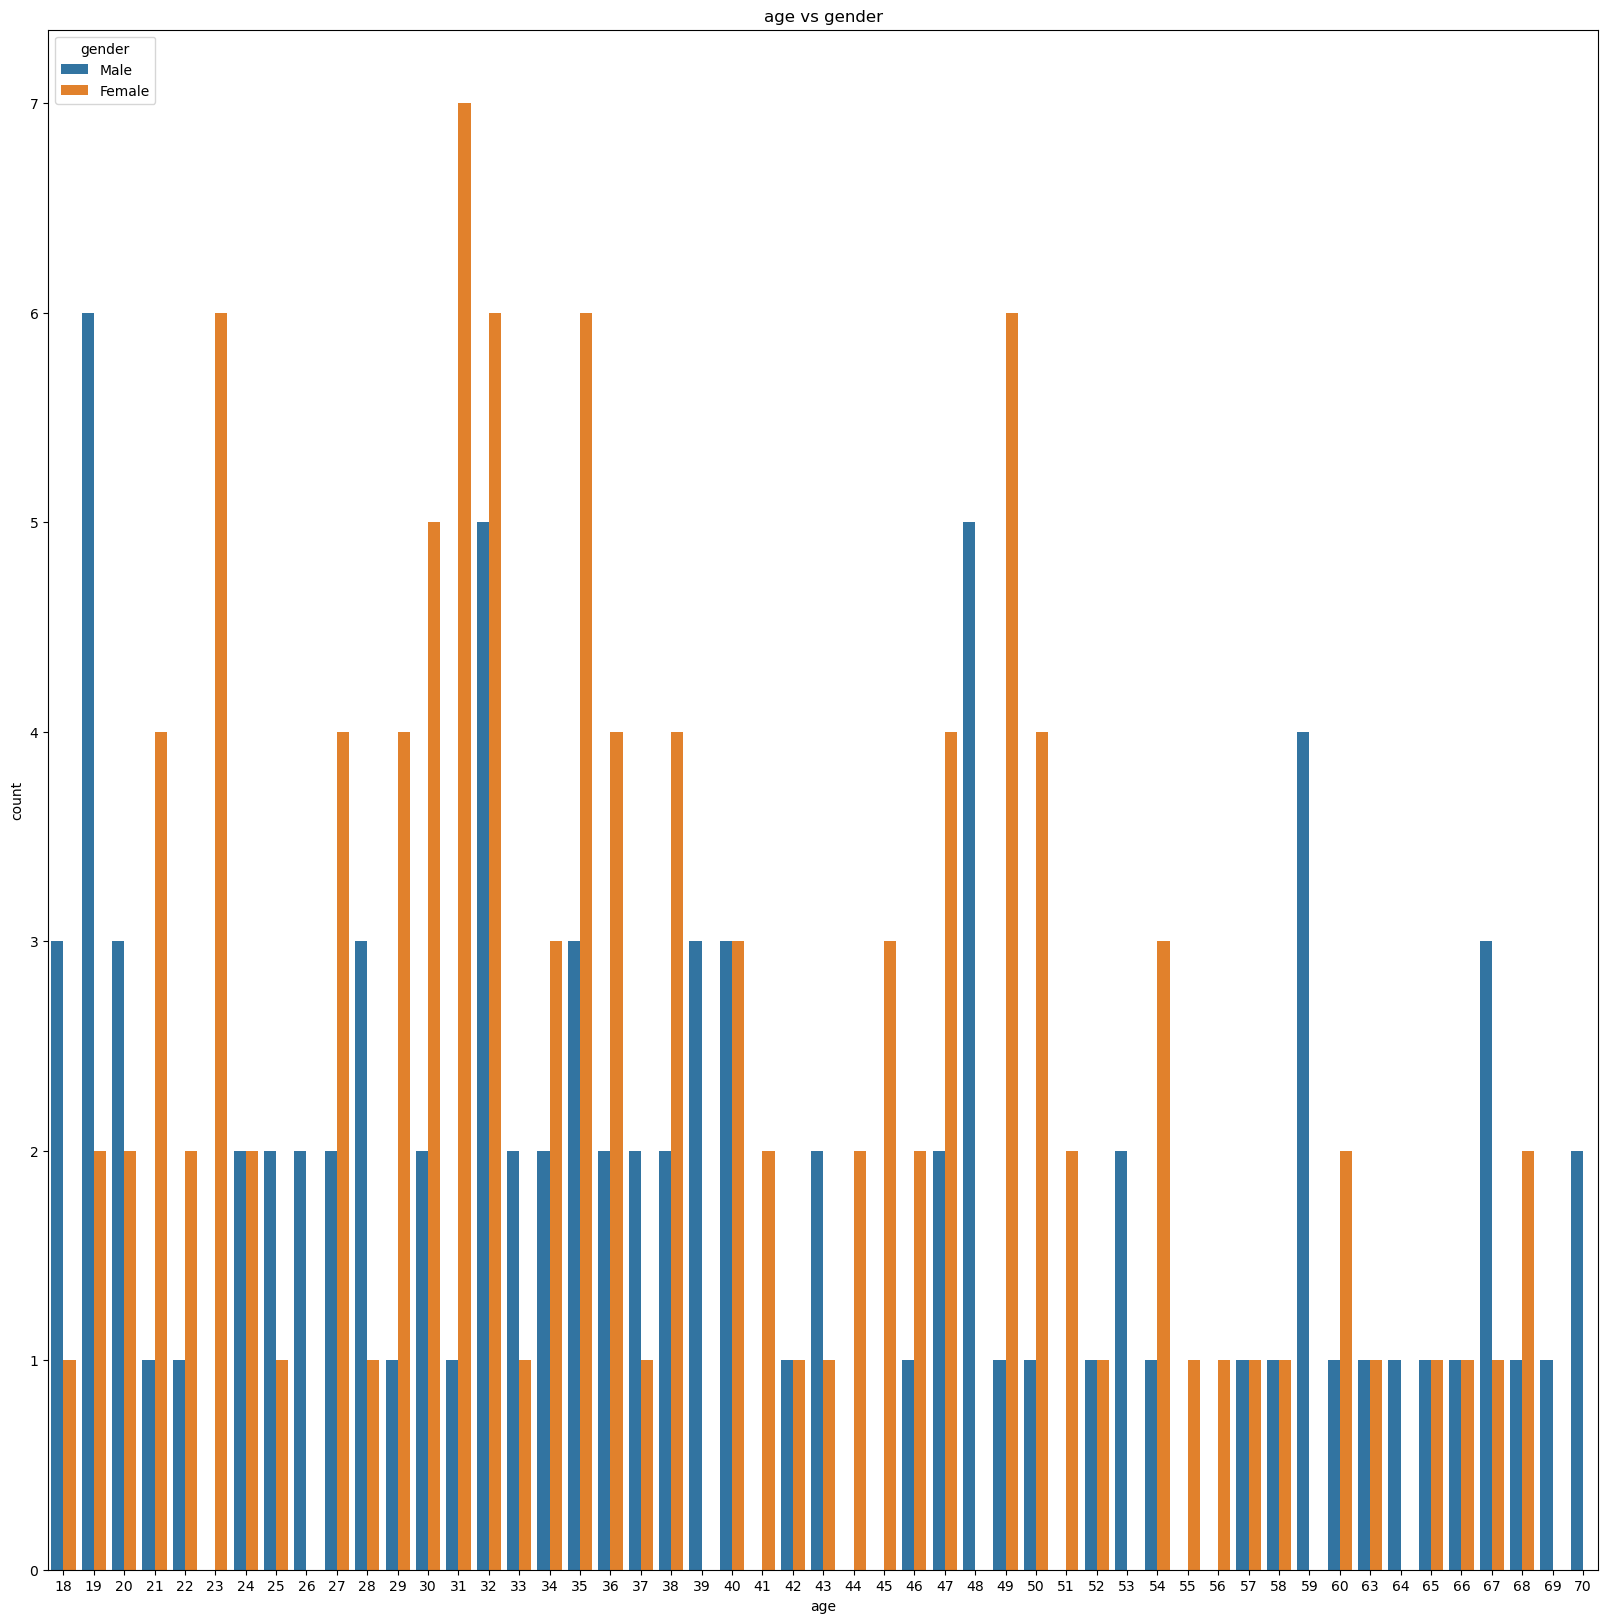

In [22]:
#gender vs age 
plt.figure(figsize=(20 , 20))
sns.countplot(data=df,x='age',hue='gender').set(title='age vs gender')

[Text(0.5, 1.0, 'annual income vs gender')]

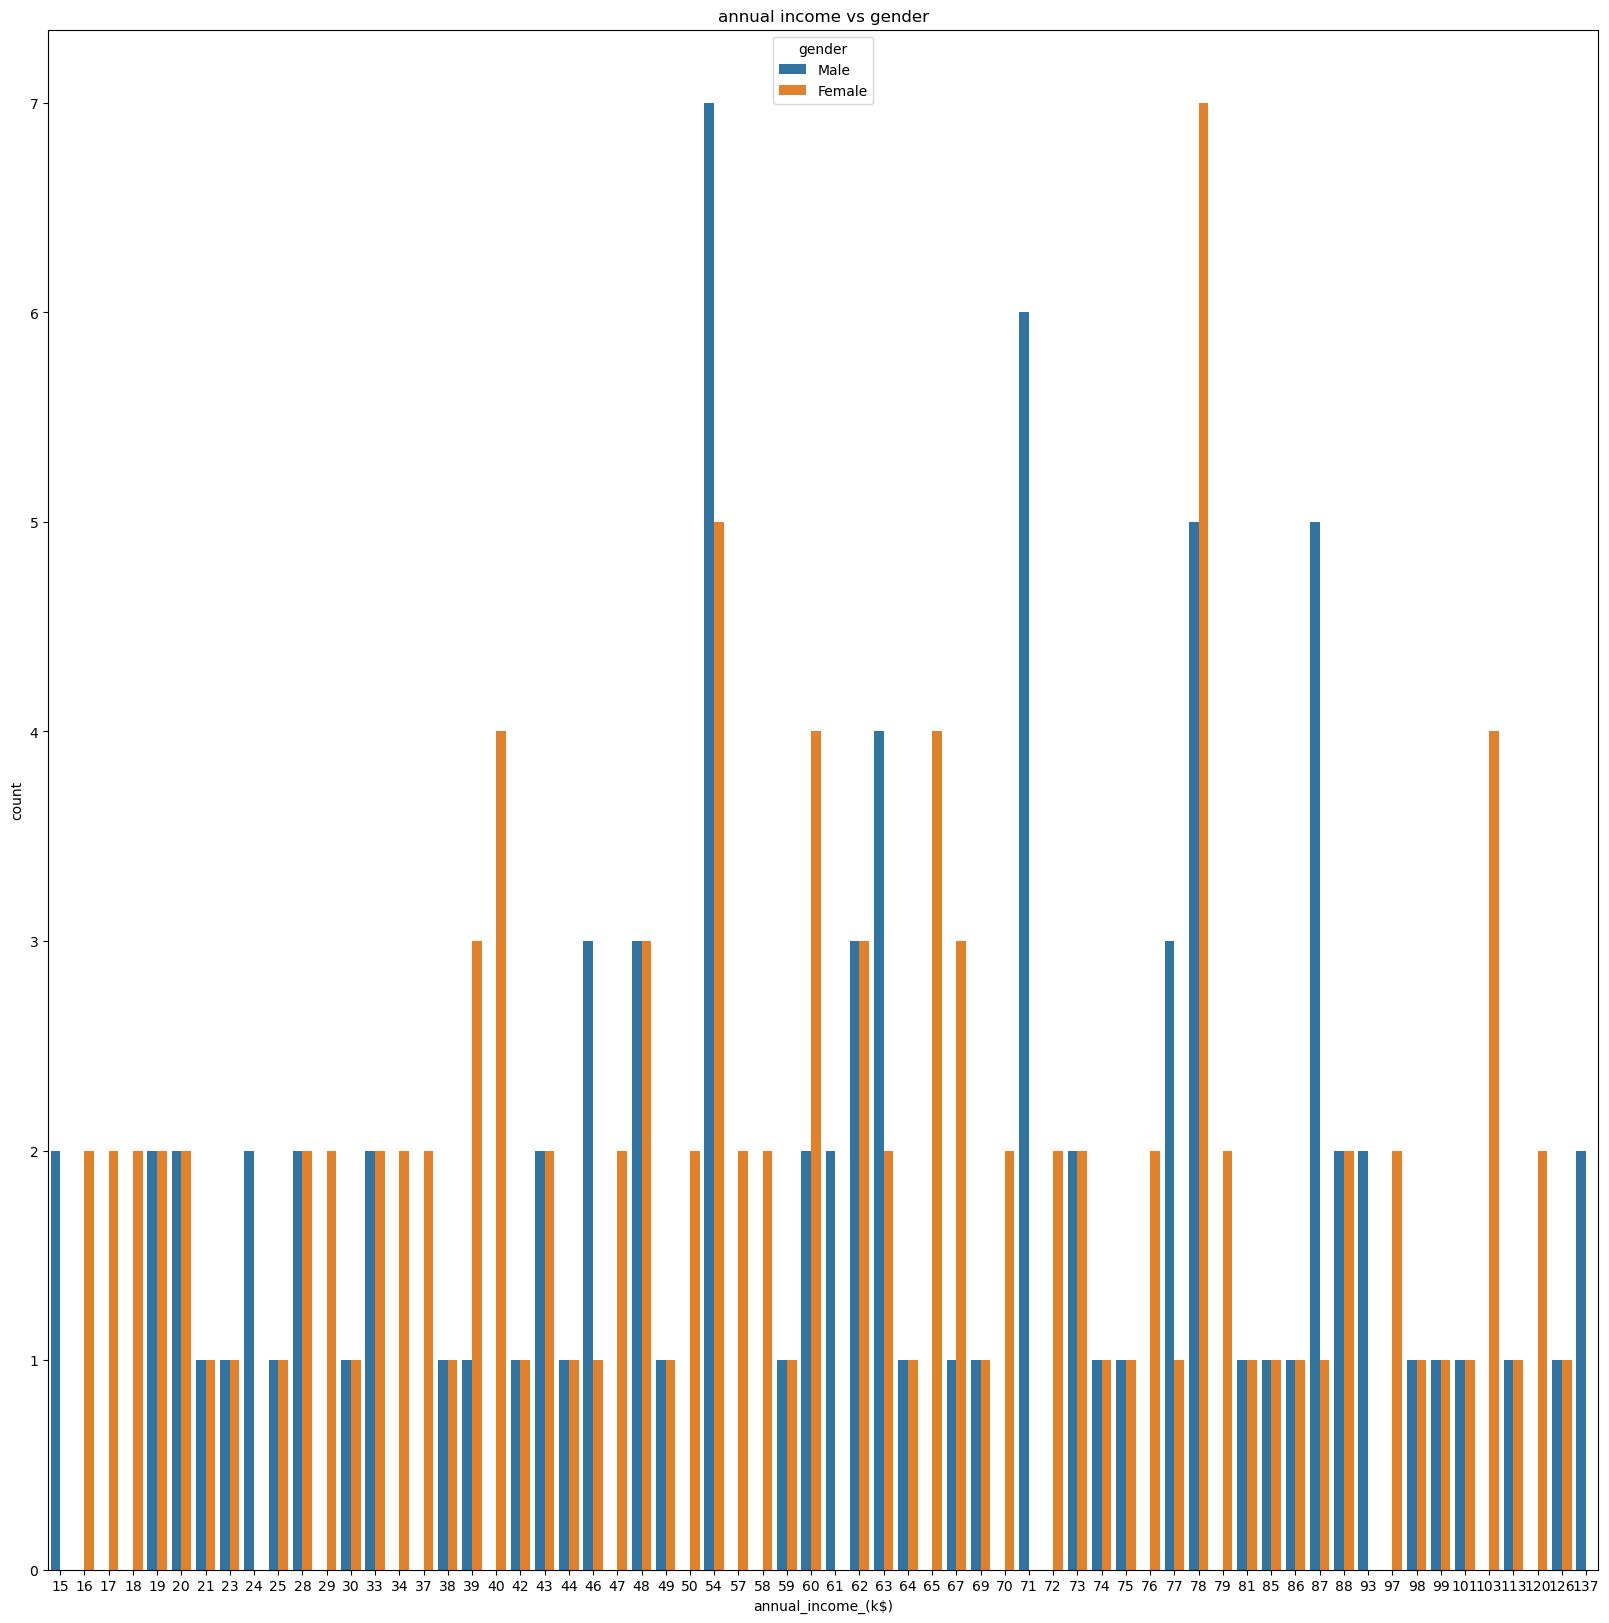

In [23]:
#gender vs annual income 
plt.figure(figsize=(20 , 20))
sns.countplot(data=df,x='annual_income_(k$)',hue='gender').set(title='annual income vs gender')

[Text(0.5, 1.0, 'spending score vs gender')]

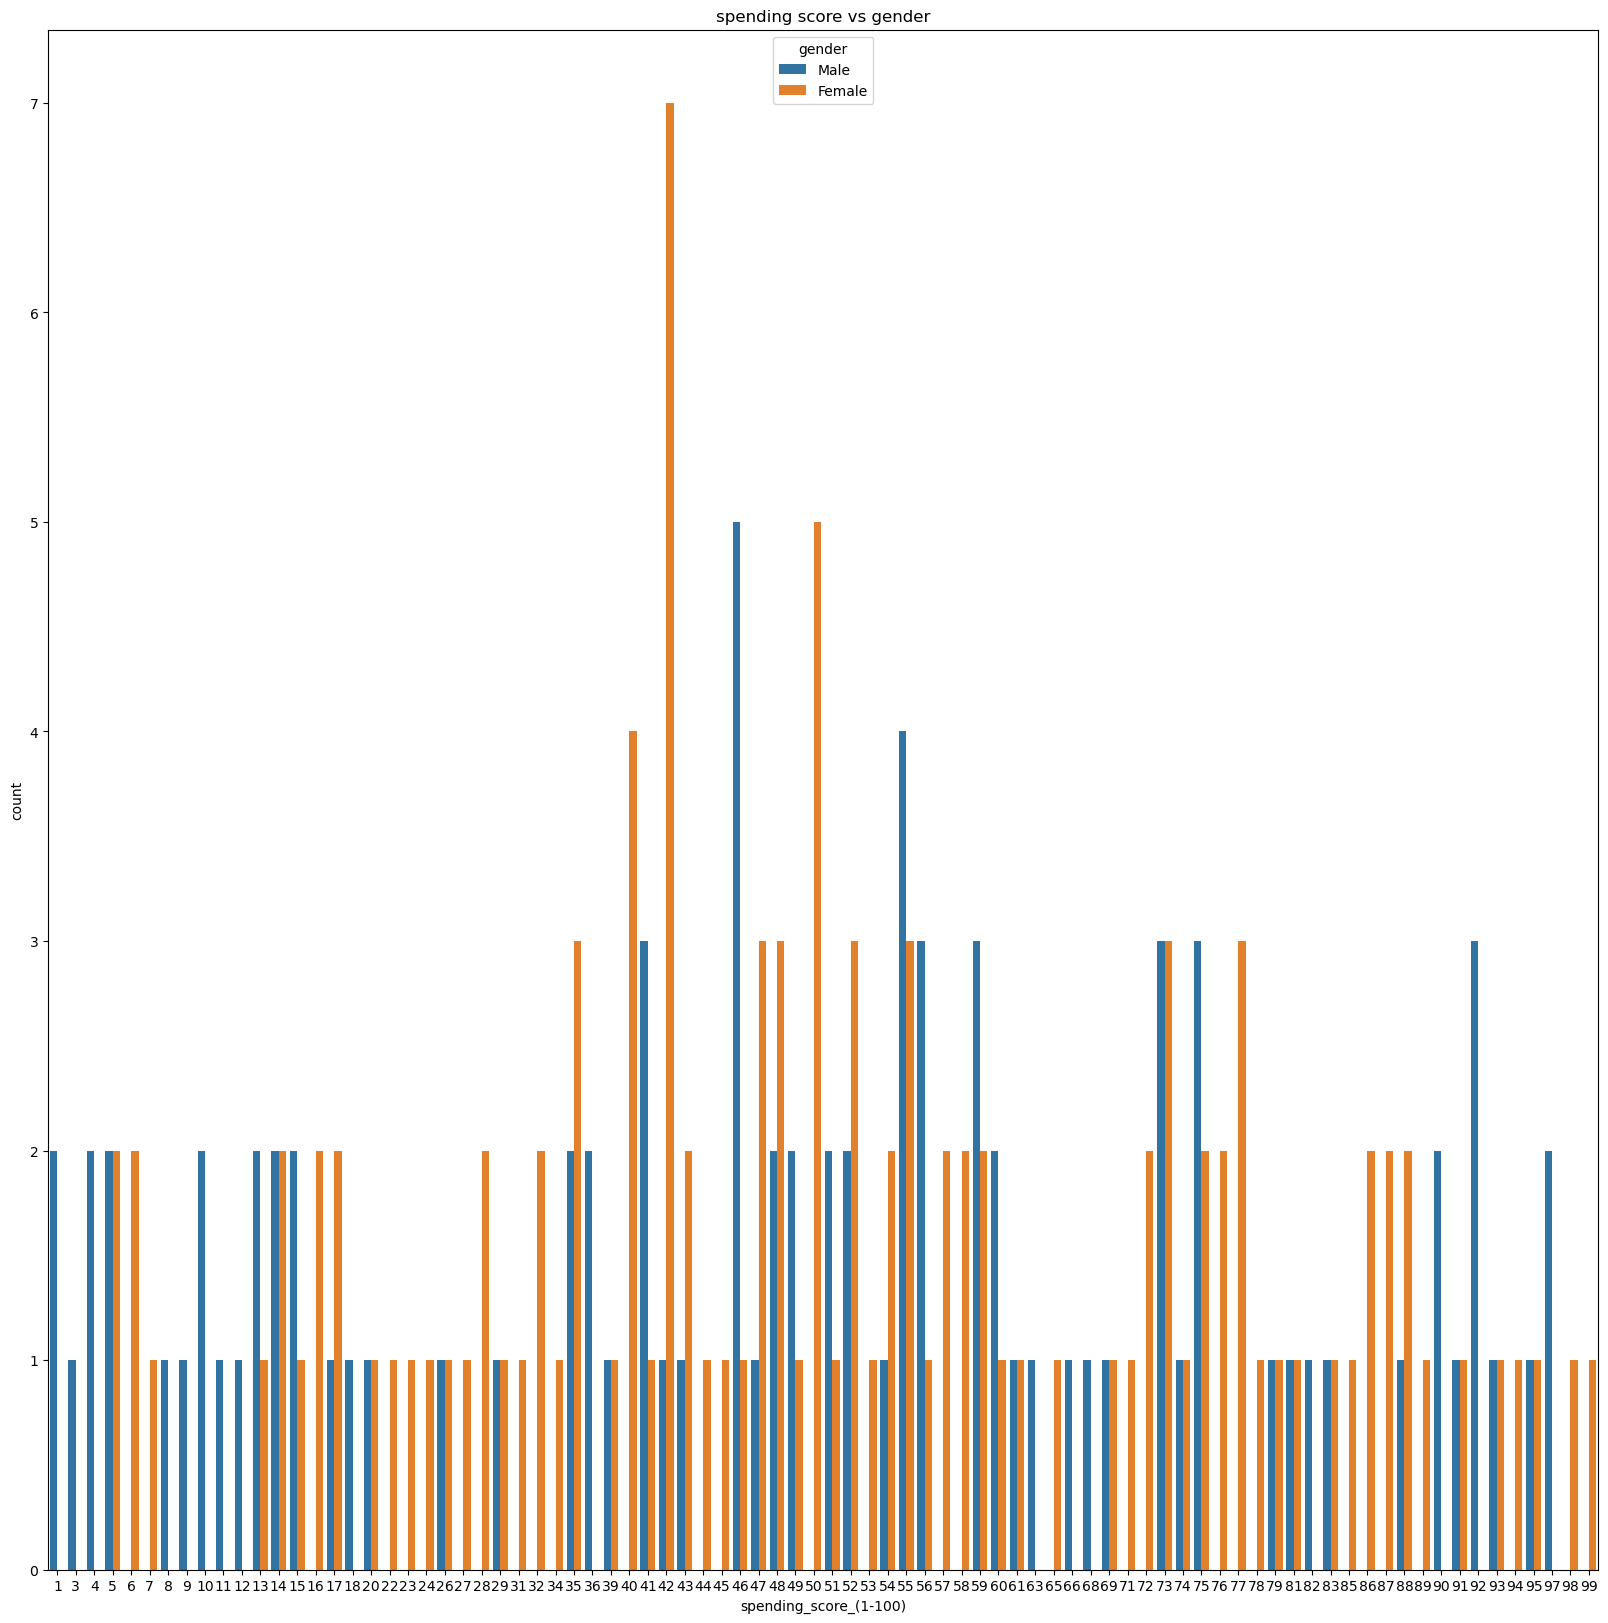

In [24]:
#gender vs spending score
plt.figure(figsize=(20 , 20))
sns.countplot(data=df,x='spending_score_(1-100)',hue='gender').set(title='spending score vs gender')

In [25]:
#annual income vs spending score
plt.figure(figsize=(20 , 20))
fig=px.scatter(df,x='annual_income_(k$)',y='spending_score_(1-100)',title='annual income vs spending score',color_discrete_sequence=['red','green'])
fig.show()

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:>

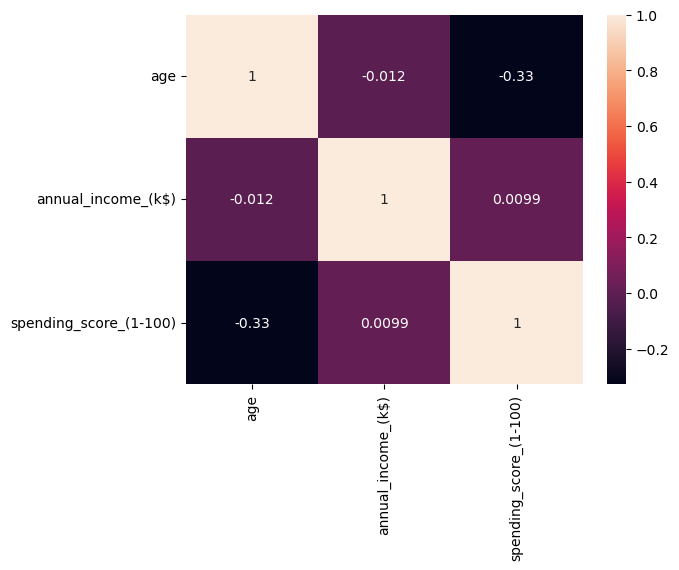

In [26]:
#correlation
sns.heatmap(df.select_dtypes('number').corr(), annot=True )

In [27]:
df.columns

Index(['gender', 'age', 'annual_income_(k$)', 'spending_score_(1-100)'], dtype='object')

In [28]:
#select the desired columns to be clustered
x=df[['annual_income_(k$)', 'spending_score_(1-100)']]
x

,annual_income_(k$),spending_score_(1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [29]:
#no encoding because there is no object columns to be clustered
#no split because there is no target to be splitted

In [30]:
#standard scaling
#create standard scaler object 
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [31]:
x_df=pd.DataFrame(x,columns=['annual_income_(k$)', 'spending_score_(1-100)'])
x_df

,annual_income_(k$),spending_score_(1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [32]:
#there is imbalancing because there is no target columns

In [33]:
#modeling ---> donot forget to scale before modeling
#kmeans model
#try with n = 3
#create k means object
model=KMeans(n_clusters=3)

In [34]:
#save all the results of prediction in the result columns
clusters=model.fit_predict(x)

In [35]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [36]:
x_df['clusters']=clusters

In [37]:
x_df

,annual_income_(k$),spending_score_(1-100),clusters
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


In [38]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_(k$)      200 non-null    float64
 1   spending_score_(1-100)  200 non-null    float64
 2   clusters                200 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 4.0 KB


In [39]:
#get the centriod
centroids=model.cluster_centers_
centroids

array([[-0.62618966, -0.01439238],
       [ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537]])

In [40]:
x_df_f=df[['annual_income_(k$)', 'spending_score_(1-100)']]
x_df_f['clusters']=clusters
x_df_f

,annual_income_(k$),spending_score_(1-100),clusters
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [41]:
#plot the centriods over clusters
px.scatter(x_df_f,'annual_income_(k$)','spending_score_(1-100)',color='clusters')
px.scatter(centroids[:,0],centroids[:,1])

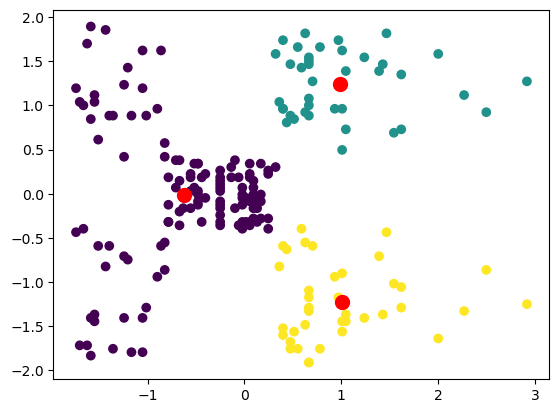

In [42]:
plt.scatter(x_df['annual_income_(k$)'],x_df['spending_score_(1-100)'],c=x_df_f['clusters'])
plt.scatter(centroids[:,0],centroids[:,1],s=100,c='red')

In [43]:
#modeling ---> donot forget to scale before modeling
#kmeans model
#try with n = 5
#create k means object
model_1=KMeans(n_clusters=5)

In [44]:
#save all the results of prediction in the result columns
clusters=model_1.fit_predict(x)

In [45]:
clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [46]:
x_df_1=pd.DataFrame(x,columns=['annual_income_(k$)', 'spending_score_(1-100)'])
x_df_1

,annual_income_(k$),spending_score_(1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [47]:
x_df_1['clusters']=clusters
x_df_1

,annual_income_(k$),spending_score_(1-100),clusters
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,3
196,2.497807,-0.861839,4
197,2.497807,0.923953,3
198,2.917671,-1.250054,4


In [48]:
x_df_1

,annual_income_(k$),spending_score_(1-100),clusters
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,3
196,2.497807,-0.861839,4
197,2.497807,0.923953,3
198,2.917671,-1.250054,4


In [49]:
x_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_income_(k$)      200 non-null    float64
 1   spending_score_(1-100)  200 non-null    float64
 2   clusters                200 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 4.0 KB


In [50]:
#get the centriod
centroids=model_1.cluster_centers_
centroids

array([[-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907]])

In [51]:
x_df_f_1=df[['annual_income_(k$)', 'spending_score_(1-100)']]
x_df_f_1['clusters']=clusters
x_df_f_1

,annual_income_(k$),spending_score_(1-100),clusters
0,15,39,0
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,0
...,...,...,...
195,120,79,3
196,126,28,4
197,126,74,3
198,137,18,4


In [52]:
#plot the centriods over clusters
px.scatter(x_df_f_1,'annual_income_(k$)','spending_score_(1-100)',color='clusters')
px.scatter(centroids[:,0],centroids[:,1])

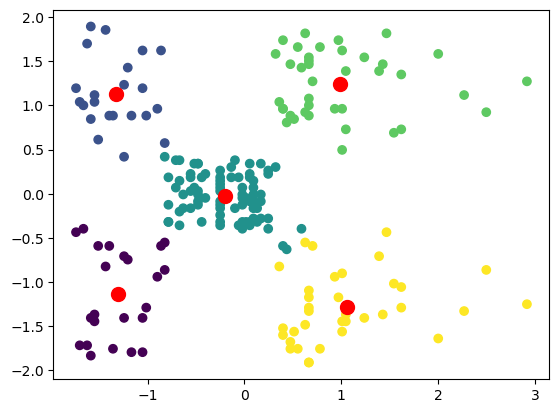

In [53]:
plt.scatter(x_df['annual_income_(k$)'],x_df['spending_score_(1-100)'],c=x_df_f_1['clusters'])
plt.scatter(centroids[:,0],centroids[:,1],s=100,c='red')

Text(0, 0.5, 'inertia')

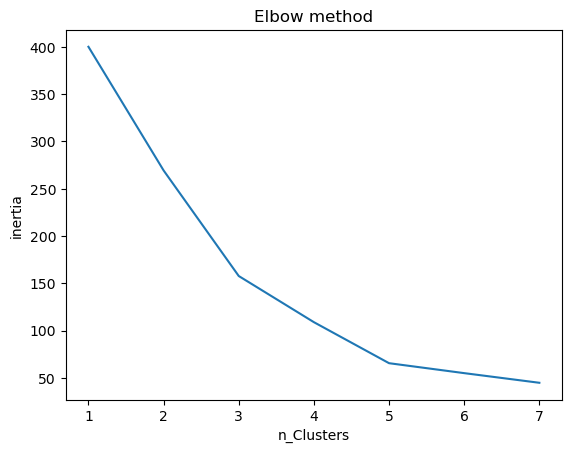

In [54]:
#ELbow method to show the best choice of k
scores=[]
for i in range(1,8):
    model=KMeans(n_clusters=i)
    model.fit(x_df[['annual_income_(k$)', 'spending_score_(1-100)']])
    scores.append(model.inertia_)
plt.plot(range(1,8),scores)
plt.title('Elbow method')
plt.xlabel('n_Clusters')
plt.ylabel('inertia')

In [56]:
#save and load our model
#save
import pickle
pickle.dump(model_1, open('model.pkl', 'wb'))

In [57]:
#load the model
pickled_model = pickle.load(open('model.pkl', 'rb'))